In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Ayush/combined_filtered_data.csv"
from sklearn.metrics import mean_absolute_percentage_error as mape
#use collections to get a count frequency of each tuple
from collections import Counter

In [17]:
#read the comparison dataset
df2 = pd.read_csv("/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Atharva/SOAX analysis/ComparisonDataset_final.csv")
#selecting the columns to filter the df2 data based upon
filterCols = ['filename','ridge', 'stretch','Original Count','Original Median Length',  'Original Median Intensity',
'Obtained Count', 'Obtained Median Length', 'Obtained Median Intensity']
#filtering the data
data = df2[filterCols].copy()

#create a list of tuples of (ridge, stretch) values
ridges = data['ridge'].values
stretches = data['stretch'].values

#zip them together as tuple
rs_params = list(zip(ridges, stretches))
#count frequency of each tuple
rs_params_count = Counter(rs_params)
#get a list of unique tuples and store it in 'params'
params = list(rs_params_count.keys())

#select a random value that has AB in it from this list(data['filename'].unique())
import random
random.seed(0)
f_ab = random.choice([i for i in list(data['filename'].unique()) if 'AB' in i])
f_bb = random.choice([i for i in list(data['filename'].unique()) if 'BB' in i])
#create copy of the data
data_original = data.copy()
#prints the randomly selected filenames for AB and BB
print(f_ab, f_bb)

AB(64) BB(109)


In [180]:
data[(data['filename'].str.contains('BB'))]['filename'].unique()

array(['BB(18)', 'BB(59)', 'BB(54)', 'BB(4)', 'BB(62)', 'BB(12)',
       'BB(109)', 'BB(26)', 'BB(20)', 'BB(17)'], dtype=object)

In [18]:
data['MAPE_Count'] = 100*(data['Original Count'] - data['Obtained Count']).abs()/data['Original Count']
data['MAPE_Length'] = 100*(data['Original Median Length'] - data['Obtained Median Length']).abs()/data['Original Median Length']
data['MAPE_Intensity'] = 100*(data['Original Median Intensity'] - data['Obtained Median Intensity']).abs()/data['Original Median Intensity']

In [20]:
data['MAPE_Count'].min(), data['MAPE_Length'].min(), data['MAPE_Intensity'].min()

(0.0, 0.020517029134188222, 0.0015896829780672576)

In [21]:
data['MAPE_Count'].max(), data['MAPE_Length'].max(), data['MAPE_Intensity'].max()

(173.52941176470588, 295.8179783255534, 76.30762090240691)

In [22]:
data['MAPE_Count'].mean(), data['MAPE_Length'].mean(), data['MAPE_Intensity'].mean()

(39.329530558179144, 35.8115166576915, 19.61581537190198)

In [24]:
data['MAPE_Combined'] = (data['MAPE_Count'] + data['MAPE_Length'] + data['MAPE_Intensity'])/3

In [28]:
data_ab = data[(data['filename'].str.contains('AB'))&(data['filename']!=f_ab)]
data_bb = data[(data['filename'].str.contains('BB'))&(data['filename']!=f_bb)]

In [29]:
df_ab = data[data['filename']==f_ab]
df_bb = data[data['filename']==f_bb]

In [32]:
data_ab['MAPE_Combined'].mean(), data_bb['MAPE_Combined'].mean()

(31.080673960456483, 34.066576094889946)

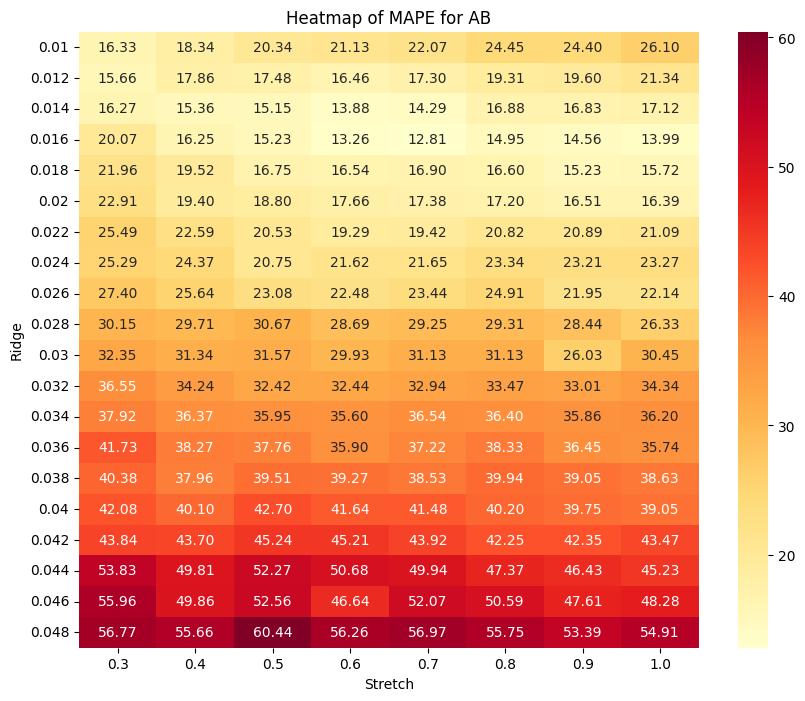

In [42]:
# data_ab.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean()
heatmap_ab = data_ab.pivot_table(index='ridge', columns='stretch', values='MAPE_Combined', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_ab, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.title('Heatmap of MAPE for AB')
plt.show()

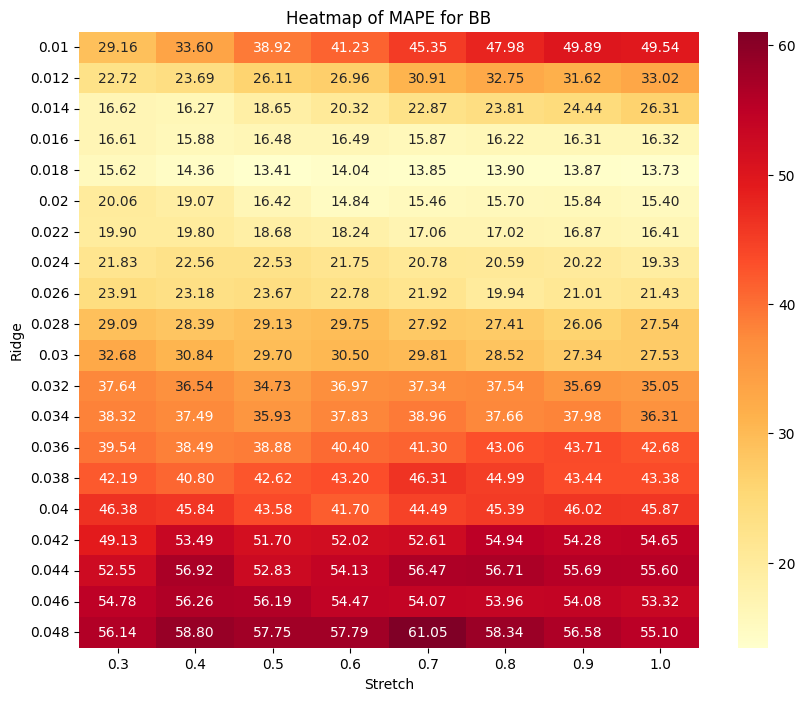

In [43]:
# data_bb.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean()
heatmap_bb = data_bb.pivot_table(index='ridge', columns='stretch', values='MAPE_Combined', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_bb, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.title('Heatmap of MAPE for BB')

plt.show()

In [54]:
#select the minimum value of MAPE_Combined for AB 
data_ab.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()


(0.016, 0.7)

In [74]:
ridge_ab = data_ab.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()[0]
stretch_ab = data_ab.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()[1]

ridge_bb = data_bb.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()[0]
stretch_bb = data_bb.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()[1]

In [76]:
df_ab_best = df_ab[(df_ab['ridge']==ridge_ab)&(df_ab['stretch']==stretch_ab)]
df_bb_best = df_bb[(df_bb['ridge']==ridge_bb)&(df_bb['stretch']==stretch_bb)]

In [80]:
# df_bb_best.T

In [55]:
#select the minimum value of MAPE_Combined for BB
data_bb.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().idxmin()

(0.018, 0.5)

In [73]:
data_bb[(data_bb['ridge']==0.018)&(data_bb['stretch']==0.5)].groupby(['ridge', 'stretch'])[['MAPE_Combined']].mean()

,,MAPE_Combined
ridge,stretch,
0.018,0.5,13.409638


In [62]:
#select the row with the minimum value of MAPE_Combined for AB in the groupby object
#filter based on the ridge and stretch values
data_ab[(data_ab['ridge']==0.016)&(data_ab['stretch']==0.7)].groupby(['ridge', 'stretch'])[['MAPE_Combined']].mean()

,,MAPE_Combined
ridge,stretch,
0.016,0.7,12.807081


In [71]:
data_bb[['filename', 'ridge', 'stretch', 'Original Count',
       'Original Median Length', 'Original Median Intensity','MAPE_Count',
       'MAPE_Length', 'MAPE_Intensity', 'MAPE_Combined']]

,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,MAPE_Count,MAPE_Length,MAPE_Intensity,MAPE_Combined
0,BB(18),0.048,0.5,32,50.530,15137.1185,59.375000,119.671482,38.065742,72.370741
1,BB(18),0.026,0.5,32,50.530,15137.1185,21.875000,36.552543,27.237787,28.555110
2,BB(18),0.012,0.7,32,50.530,15137.1185,34.375000,20.839105,0.246141,18.486749
3,BB(18),0.034,0.6,32,50.530,15137.1185,31.250000,30.615476,30.802354,30.889277
4,BB(18),0.016,0.4,32,50.530,15137.1185,9.375000,6.985949,9.882144,8.747698
...,...,...,...,...,...,...,...,...,...,...
2875,BB(17),0.042,0.6,46,35.816,22502.7585,69.565217,0.513737,23.072801,31.050585
2876,BB(17),0.018,0.4,46,35.816,22502.7585,19.565217,5.070360,5.865792,10.167123
2877,BB(17),0.046,0.5,46,35.816,22502.7585,76.086957,22.850123,28.669939,42.535673
2878,BB(17),0.028,0.5,46,35.816,22502.7585,52.173913,14.473978,5.937002,24.194964


In [72]:
data_bb.groupby(['ridge', 'stretch'])['MAPE_Combined'].mean().reset_index()

,ridge,stretch,MAPE_Combined
0,0.010,0.3,29.160953
1,0.010,0.4,33.604816
2,0.010,0.5,38.915908
3,0.010,0.6,41.229121
4,0.010,0.7,45.348351
...,...,...,...
155,0.048,0.6,57.786348
156,0.048,0.7,61.051259
157,0.048,0.8,58.341731
158,0.048,0.9,56.581810


In [86]:
data[(data['filename'].str.contains('AB'))&(data['ridge']==ridge_ab)&(data['stretch']==stretch_ab)]

,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,Obtained Count,Obtained Median Length,Obtained Median Intensity,MAPE_Count,MAPE_Length,MAPE_Intensity,MAPE_Combined
244,AB(11),0.016,0.7,40,38.9920,39907.0840,42,31.0,39551.936219,5.000000,20.496512,0.889937,8.795483
568,AB(31),0.016,0.7,70,28.0170,25568.9600,70,23.0,26513.622727,0.000000,17.906985,3.694568,7.200518
1095,AB(101),0.016,0.7,86,18.3165,16581.6240,63,19.0,16769.575000,26.744186,3.731608,1.133490,10.536428
1191,AB(51),0.016,0.7,96,26.9530,39872.0605,92,19.0,42192.792982,4.166667,29.506919,5.820448,13.164678
1539,AB(5),0.016,0.7,84,25.0915,33645.3400,67,21.0,36792.871429,20.238095,16.306319,9.355029,15.299814
1962,AB(104),0.016,0.7,84,24.0520,33425.5470,86,20.5,34127.517222,2.380952,14.768003,2.100101,6.416352
2480,AB(64),0.016,0.7,77,40.1260,41605.0390,92,26.5,41084.874661,19.480519,33.958032,1.250244,18.229598
2647,AB(24),0.016,0.7,146,27.0270,21439.3930,64,27.5,22958.510859,56.164384,1.750102,7.085638,21.666708
2987,AB(12),0.016,0.7,34,56.6585,19008.4130,34,27.0,20107.845455,0.000000,52.346073,5.783926,19.376666


In [87]:
from glob import glob
gt_op_path = "/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Atharva/SOAX analysis/SOAX ground truth csvs 121923/"
soax_op_path = "/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Atharva/SOAX analysis/SOAX output csvs gray 121923/"

In [92]:
gt_op_list = glob(gt_op_path + '*.csv')
soax_op_list = glob(soax_op_path + '*/*')

In [99]:
for i in gt_op_list:
    if f_ab in i:
        df_ab_64_gt = pd.read_csv(i)
    if f_bb in i:
        df_bb_64_gt = pd.read_csv(i)

In [102]:
for i in soax_op_list:
    if f_ab in i:
        if str(ridge_ab) in i and str(stretch_ab) in i:
            df_ab_64_soax = pd.read_excel(i)
    if f_bb in i:
        if str(ridge_bb) in i and str(stretch_bb) in i:
            df_bb_64_soax = pd.read_excel(i)

In [146]:
df_ab_combined = pd.DataFrame()
df_bb_combined = pd.DataFrame()

In [151]:
count_ab = []
count_bb = []
for i in soax_op_list:
    if 'AB' in i:
        if str(ridge_ab) in i and str(stretch_ab) in i:
            df_ab_combined = pd.concat([df_ab_combined, pd.read_excel(i)], axis=0)
            count_ab.append(pd.read_excel(i).shape[0])
    if 'BB' in i:
        if str(ridge_bb) in i and str(stretch_bb) in i:
            df_bb_combined = pd.concat([df_bb_combined, pd.read_excel(i)], axis=0)
            count_bb.append(pd.read_excel(i).shape[0])

In [159]:
df_count = pd.DataFrame([count_ab,count_bb], index=['AB', 'BB']).T

In [148]:
df_bb_combined

,Snake Index,Average FG Intensity,Average BG Intensity,Median FG Intensity,Median BG Intensity,Euclidean Distance,Snake Body Length,Convolutedness
0,0,59606.640132,34819.508224,65404.80,33881.55,287.645603,304,1.056856
1,1,41893.298621,25981.077931,38241.00,22544.50,139.362915,145,1.040449
2,2,59937.165672,51259.570149,61395.70,52863.30,36.673990,67,1.826908
3,3,60126.627211,43809.491156,65513.00,44825.50,133.862773,147,1.098140
4,4,61902.223148,48492.479167,65513.00,49690.30,210.625786,216,1.025515
...,...,...,...,...,...,...,...,...
36,36,18001.222222,15169.644444,15892.90,14783.90,7.864460,9,1.144389
37,37,15753.500000,13578.833333,14767.90,13620.90,7.650908,9,1.176331
38,38,12247.700000,10792.091667,12285.10,10700.45,11.319509,12,1.060117
39,39,16806.250000,13865.792857,16692.15,13331.05,12.629028,14,1.108557


In [ ]:
df_ab_combined = df_ab_combined.reset_index(drop=True)

In [150]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have two datasets: data1 and data2
# data1 = np.random.normal(0, 1, 1000)
# data2 = np.random.normal(1, 1, 1000)

# # Create the figure and subplots
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the first histogram
# ax[0].hist(data1, bins=20, alpha=0.5, label='Data 1')
# ax[0].set_title('Histogram of Data 1')
# ax[0].set_xlabel('Value')
# ax[0].set_ylabel('Frequency')
# ax[0].legend()

# # Plot the second histogram
# ax[1].hist(data2, bins=20, alpha=0.5, label='Data 2')
# ax[1].set_title('Histogram of Data 2')
# ax[1].set_xlabel('Value')
# ax[1].set_ylabel('Frequency')
# ax[1].legend()

# # Adjust the spacing
# plt.subplots_adjust(wspace=0.4)

# # Show the plot
# plt.show()

In [110]:
sns.set_palette("Paired")

In [125]:
# df_ab_64_gt

In [120]:
df_ab_64_soax.columns

Index(['Snake Index', 'Average FG Intensity', 'Average BG Intensity',
       'Median FG Intensity', 'Median BG Intensity', 'Euclidean Distance',
       'Snake Body Length', 'Convolutedness'],
      dtype='object')

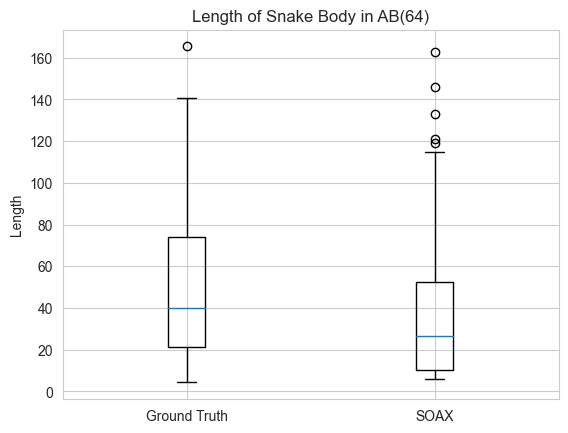

In [127]:
# Create a figure and axis objects for length comparison
fig, ax = plt.subplots()
ax.boxplot([df_ab_64_gt['Length'], df_ab_64_soax['Snake Body Length']], labels=['Ground Truth', 'SOAX'])
ax.set_title('Length of Snake Body in AB(64)')
ax.set_ylabel('Length')
plt.show()

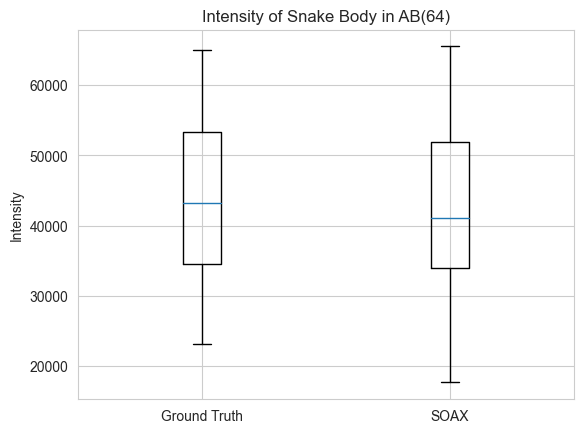

In [134]:
# Create a figure and axis objects for intensity comparison
fig, ax = plt.subplots()
ax.boxplot([df_ab_64_gt['Mean'], df_ab_64_soax['Average FG Intensity']], labels=['Ground Truth', 'SOAX'])
# Customizing colors for boxes and whiskers
ax.set_title('Intensity of Snake Body in AB(64)')
ax.set_ylabel('Intensity')
plt.show()


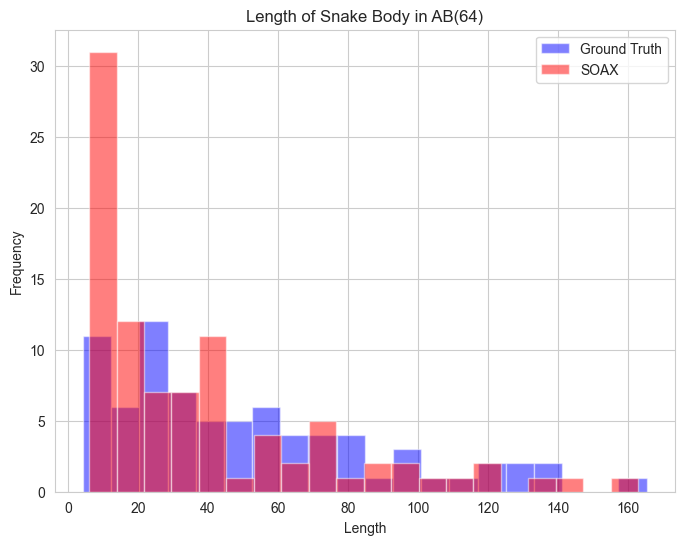

In [141]:
import matplotlib.pyplot as plt

# Histogram 1: Length of Snake Body
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_ab_64_gt['Length'], bins=20, alpha=0.5, label='Ground Truth', color='blue')
ax.hist(df_ab_64_soax['Snake Body Length'], bins=20, alpha=0.5, label='SOAX', color='red')
ax.set_title('Length of Snake Body in AB(64)')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


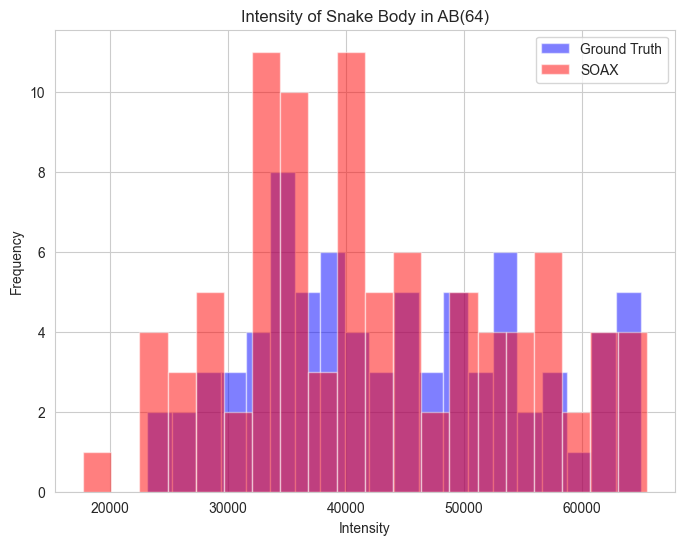

In [142]:
# Histogram 2: Intensity of Snake Body
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_ab_64_gt['Mean'], bins=20, alpha=0.5, label='Ground Truth', color='blue')
ax.hist(df_ab_64_soax['Average FG Intensity'], bins=20, alpha=0.5, label='SOAX', color='red')
ax.set_title('Intensity of Snake Body in AB(64)')
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

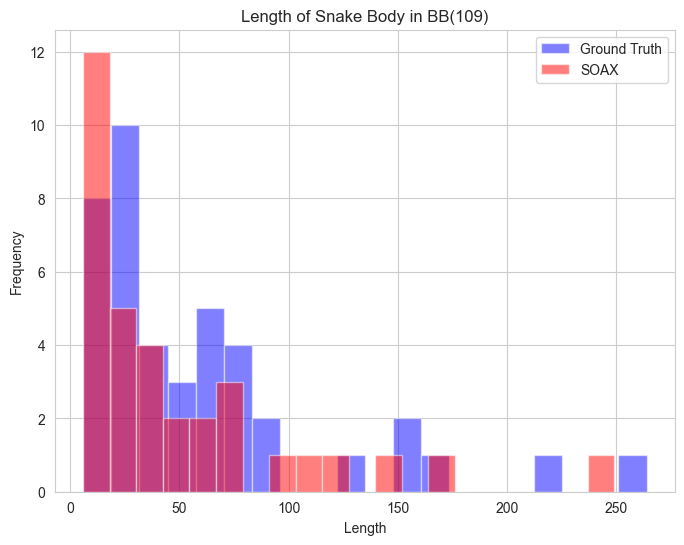

In [143]:

# Histogram 1: Length of Snake Body
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_bb_64_gt['Length'], bins=20, alpha=0.5, label='Ground Truth', color='blue')
ax.hist(df_bb_64_soax['Snake Body Length'], bins=20, alpha=0.5, label='SOAX', color='red')
ax.set_title('Length of Snake Body in BB(109)')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


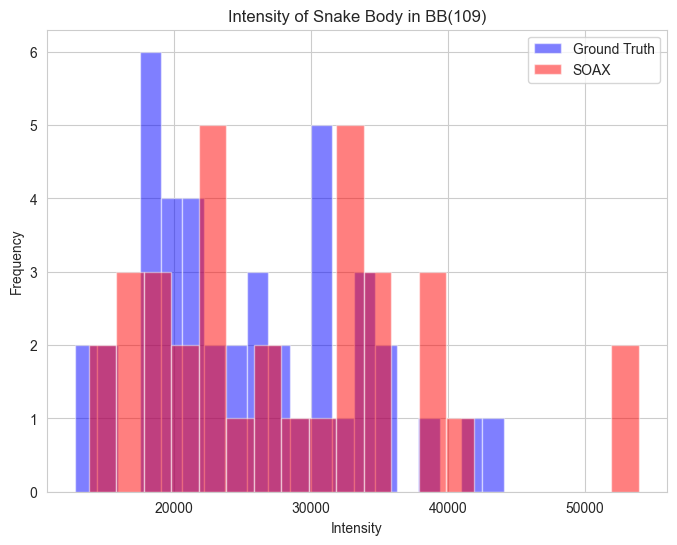

In [144]:
# Histogram 2: Intensity of Snake Body
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_bb_64_gt['Mean'], bins=20, alpha=0.5, label='Ground Truth', color='blue')
ax.hist(df_bb_64_soax['Average FG Intensity'], bins=20, alpha=0.5, label='SOAX', color='red')
ax.set_title('Intensity of Snake Body in BB(109)')
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [166]:
df_ab_combined.columns

Index(['Snake Index', 'Average FG Intensity', 'Average BG Intensity',
       'Median FG Intensity', 'Median BG Intensity', 'Euclidean Distance',
       'Snake Body Length', 'Convolutedness'],
      dtype='object')

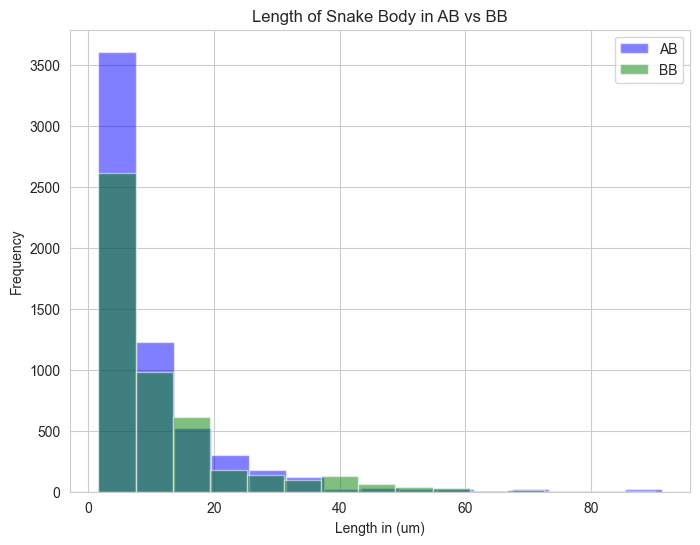

In [174]:
count_ab = []
count_bb = []
for i in soax_op_list:
    if 'AB' in i:
        if str(ridge_ab) in i and str(stretch_ab) in i:
            df_ab_combined = pd.concat([df_ab_combined, pd.read_excel(i)], axis=0)
            count_ab.append(pd.read_excel(i).shape[0])
    if 'BB' in i:
        # if str(ridge_bb) in i and str(stretch_bb) in i:
        if str(ridge_ab) in i and str(stretch_ab) in i:
            df_bb_combined = pd.concat([df_bb_combined, pd.read_excel(i)], axis=0)
            count_bb.append(pd.read_excel(i).shape[0])

# Histogram 5: Snake Length Across Distributions
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_ab_combined['Snake Body Length']*0.267, bins=15, alpha=0.5, label='AB', color='blue')
ax.hist(df_bb_combined['Snake Body Length']*0.267, bins=15, alpha=0.5, label='BB', color='green')
ax.set_title('Length of Snake Body in AB vs BB')
ax.set_xlabel('Length in (um)')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [176]:
df_ab_combined.columns

Index(['Snake Index', 'Average FG Intensity', 'Average BG Intensity',
       'Median FG Intensity', 'Median BG Intensity', 'Euclidean Distance',
       'Snake Body Length', 'Convolutedness'],
      dtype='object')

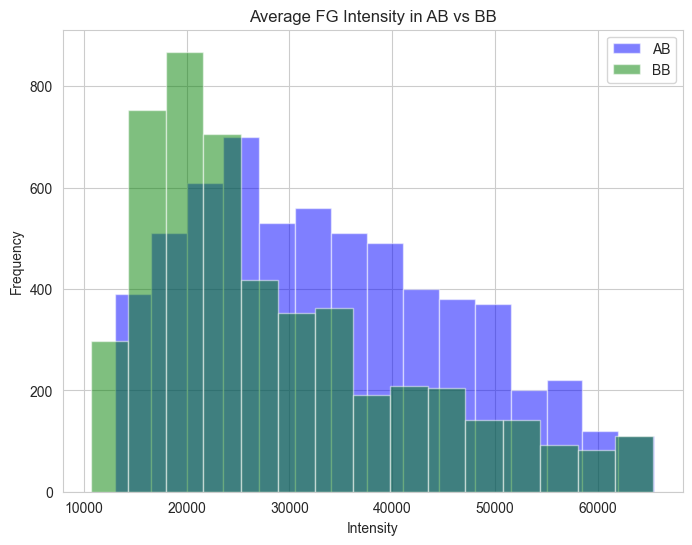

In [177]:
# Histogram 5: Snake Length Across Distributions
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_ab_combined['Average FG Intensity'], bins=15, alpha=0.5, label='AB', color='blue')
ax.hist(df_bb_combined['Average FG Intensity'], bins=15, alpha=0.5, label='BB', color='green')
ax.set_title('Average FG Intensity in AB vs BB')
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()